In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S
640,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S


survival -- Survival -- 0 = No, 1 = Yes
pclass -- Ticket class -- 1 = 1st, 2 = 2nd, 3 = 3rd
sex -- Sex	
Age -- Age in years	
sibsp -- # of siblings / spouses aboard the Titanic	
parch -- # of parents / children aboard the Titanic	
ticket -- Ticket number	
fare -- Passenger fare	
cabin -- Cabin number	
embarked -- Port of Embarkation -- C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Survival- bağımlı değişken
Name- benzersiz değişkenler (bir anlamı yok)

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age'de eksik veriler var. Makine öğrenmesi için problem. Başka eksik değer var mı?

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin sütununda çok fazla eksik veri var. Embarked'daki eksik veri sayısı 2. 

In [7]:
def degiskenler(variable):
    kategori = train_data[variable]
    sayi = kategori.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(sayi.index,sayi)
    plt.xticks(sayi.index, sayi.index.values)
    plt.ylabel('frekans')
    plt.title(variable)
    plt.show()
    print(variable, sayi)

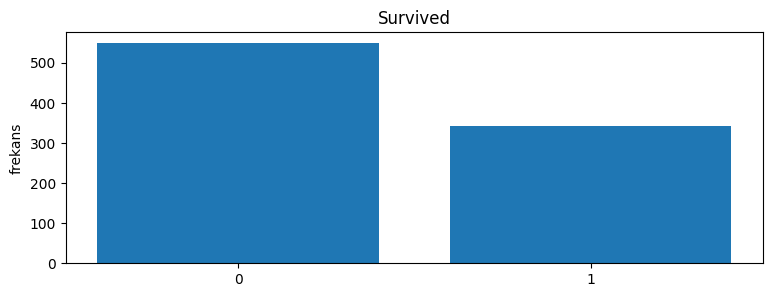

Survived Survived
0    549
1    342
Name: count, dtype: int64


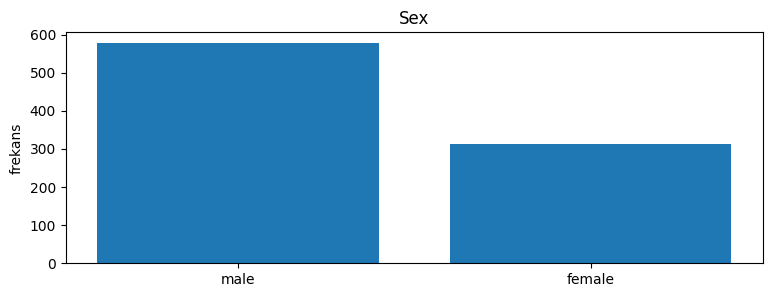

Sex Sex
male      577
female    314
Name: count, dtype: int64


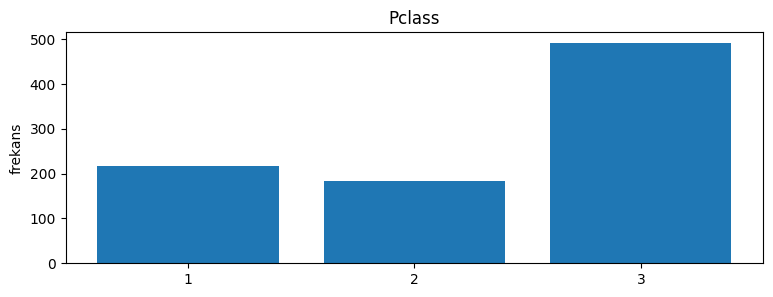

Pclass Pclass
3    491
1    216
2    184
Name: count, dtype: int64


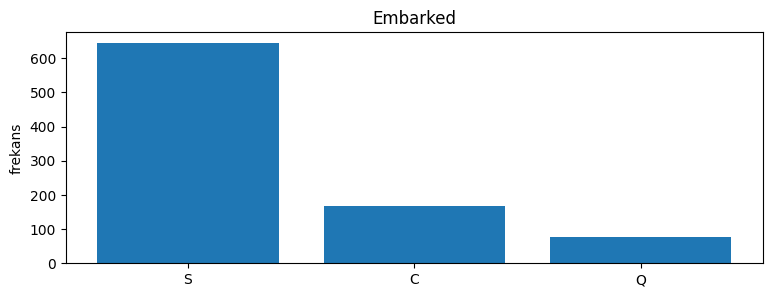

Embarked Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


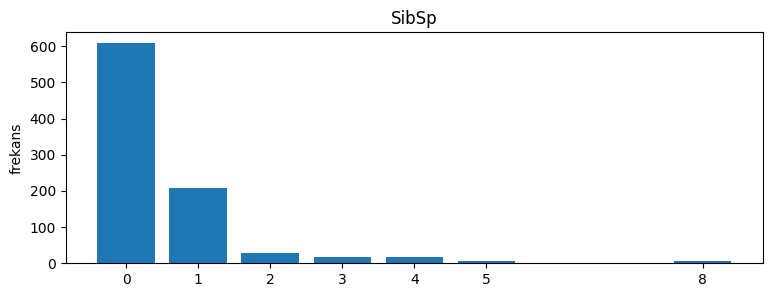

SibSp SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


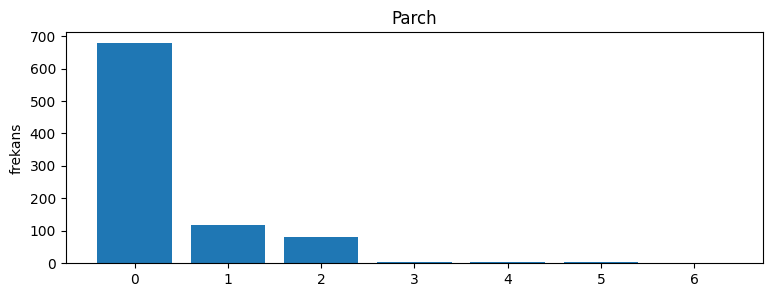

Parch Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [8]:
category1 = ['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
for i in category1:
    degiskenler(i)

Çoğunluk çocuk veya eş olmadan tek başına binmiş. Yine çoğunluk Southampton'dan gemiye binmiş.
3. sınıftakilerin sayısı çok fazla ve çoğunluğu erkekmiş. 
(Bunlar geminin genel bilgileri. Yaşayanların gösterimi ayrı.)

In [9]:
category2 = ['Cabin', 'Name', 'Ticket']
for i in category2:
    print(train_data[i]. value_counts)

<bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>
<bound method IndexOpsMixin.value_counts of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object>
<bound method IndexOpsMixin.value_counts of 0             A/5 21171
1   

Cabin ve name sütunları anlamlı veriler değildi zaten. Ticket için ise bilet fiyatının fazlalığı ile hayatta kalma arasında bağlantı olabilir. 

In [10]:
def hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_data[variable])
    plt.xlabel(variable)
    plt.ylabel('frekans')
    plt.title(variable)
    plt.show()

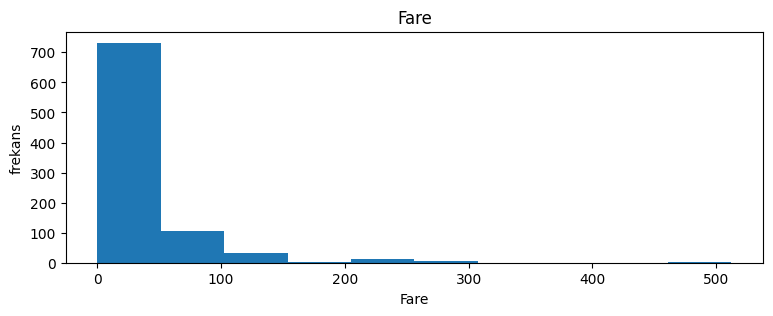

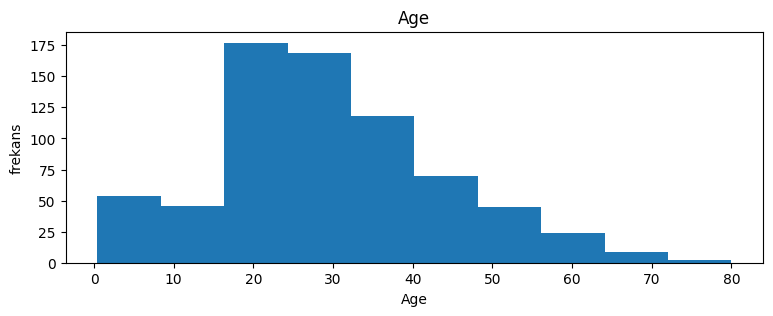

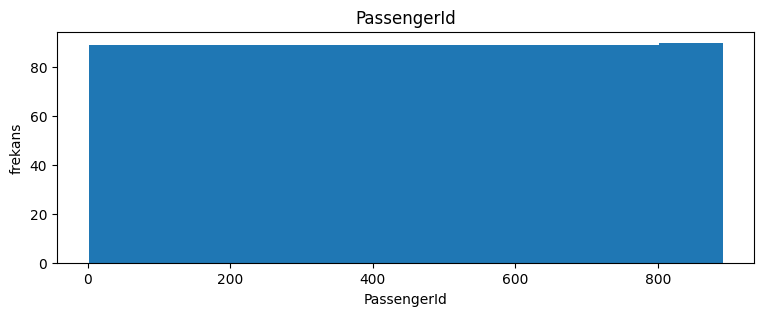

In [12]:
sayisal = ['Fare', 'Age', 'PassengerId']
for i in sayisal:
    hist(i)

PassengerId'nin bir anlamı yok, görüntülemek için burada.

In [13]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


1. sınıf yolcuların %63'ü, 2. sınıf yolcuların %47'si, 3. sınıf yolcuların %24'ü kurtulmuştur. (Toplamı 100 etmez, sınıf bazlı olduğu için)
Yani örneğin; 3. sınıf olan 491 yolcunun 118'i kurtulmuş denilebilir.

In [14]:
train_data[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Erkeklerin %18'i hayatta kalırken, kadınların %74'ü hayatta kalmıştır.

In [17]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived')

,SibSp,Survived
6,8,0.000000
5,5,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


1 çocuk ya da kardeş, eş vs. ile gelenlerin kurtulma olanları çok daha yüksekmiş.

In [18]:
train_data[['Parch', 'Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived')

,Parch,Survived
6,6,0.000000
4,4,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


3 kişi gelenlerin kurtulma olasılığı çok daha yüksekmiş.

In [20]:
td = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
td.columns[td.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [22]:
td.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Tahmin oluşturmak için survived'ı boş bırakılır

In [23]:
td[td['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: title={'center': 'Fare'}, xlabel='Embarked'>

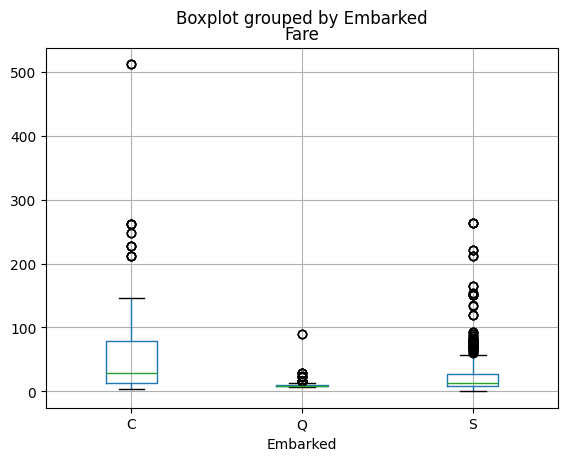

In [24]:
td.boxplot(column='Fare', by= 'Embarked')

C sınıfının diğerlerine göre daha geniş aralıkta fiyat ödediği söylenebilir. Embarked'ı eksik olan 2 kişi ise 80 dolar ödemiş. Hangi sınıfta olduklarını grafiğe bakarak 'C' sınıfı olduğunu tahmin edebiliriz.

In [25]:
td['Embarked'] = td['Embarked'].fillna('C')

In [26]:
td[td['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [28]:
td[td['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
age_median = td['Age'].median()
td['Age'] = td['Age'].fillna(age_median)

In [30]:
td[td['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Kimin kaç yaşında olduğunu öğrenmemizin bir yolu yok. Yaş sütununda eksik olan verileri yaşın medyanı ile doldurduk. 

In [32]:
td[td['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Fare'i eksik olan kişinin 3. sınıftan olduğunu görüyoruz. 3. sınıftaki yolcuların ödedikleri ücretin medyanı ile doldurabiliriz.

In [33]:
fare_median = td['Fare'].median()
td['Fare'] = td['Fare'].fillna(fare_median)

In [34]:
td[td['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [35]:
td.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

Survived kısmı tahmin edilecek değer olduğundan boş olması gerekiyor. Tahminleme işlemninde ise Cabin sütununu sileriz çünkü çok fazla veri eksik. 